# Data Analysis of Supermarket Customer

## 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

### 1.1. Reading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Supermarket Customers.csv')
df

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


File saat kita read, hanya terbaca seperti hasil di atas. Hal ini terjadi kemungkinan karena data pada file csv memiliki pemisah value satu dengan lainnya (pada kelompok data kolom) menggunakan "'tabulasi' = '\t'" dalam satu kolom. Maka dari itu kita coba tambahkan "delimiter='\t'" untuk memisahkan suatu strings teks dengan opsi delimited pada teks ke kolom berdasarkan tab ( ) yang ada pada strings teks.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Supermarket Customers.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Setelah kita pisahkan bisa terlihat data tersebut terdiri dari 2240 baris dan 29 kolom seperti yang terlihat pada pojok kiri bawah.


#### Data Dictionary

#### People
● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### Place
● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalog

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to the company’s website in the last month

### 1.2. Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### 1.2.1. Data Numerikal

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Terdapat 26 kolom dari 29 kolom yang merupakan tipe data numerikal

#### 1.2.2. Data Kategorikal

In [7]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Terdapat 3 tipe data kategorikal. Terdapat kesalahan pada Kolom 'Dt_Customer' yang merupakan tipe data 'object' yang seharusnya tipe data tanggal / datetime.

#### 1.2.3. Mengubah Tipe Data yang Salah

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y")
df.describe(include='object')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


Kolom 'Dt_Customer' sudah tidak ada di tipe data kategorikal

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

=> Kolom 'Dt_Customer' sudah berubah menjadi tipe data date

### 1.2.4. Melihat unique value pada tipe data kategorikal

In [10]:
print(df["Marital_Status"].value_counts(),'\n')
print(df["Education"].value_counts())


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


=> Kolom tipe kategorikal 'Education' dan 'Marital_Status' memiliki unique value yg dapat diproses nantinya.

### 1.3. Mencari Missing Value

In [11]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Dapat dilihat bahwa pada kolom 'Income' terdapat 24 missing value.

Jika kita lihat, proporsi missing value dari keseluruhan baris pada kolom 'Income' = 24/2240 rows = 0.011 / 1.1%
Proporsi tersebut dirasa kecil dan dapat dihilangkan.

In [12]:
df = df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Missing value sudah tidak ada.

### 1.4. Mencari Unique Value Tiap Kolom

In [13]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Dapat kita lihat bahwa tiap kolom memiliki masing2 unique value. Tetapi ada kolom yang hanya memiliki 1 unique value dalam baris, yaitu Z_CostContact dan Z_Revenue. Kita dapat menghilangkan 2 kolom tersebut karena kolom tersebut tidak dibutuhkan.

#### 1.4.1. Menghilangkan Kolom yang Tidak Dibutuhkan

In [14]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'], axis=1)

In [15]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

Kolom 'Z_CostContact' dan 'Z_Revenue' sudah berhasil dihilangkan.

### 1.5. Mencari Duplikat Data

In [16]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Tidak terdapat duplikat data pada dataset yang akan digunakan

### 1.6. Mengubah Nama Kolom

In [17]:
#Kolom Product
df = df.rename(columns={'MntWines':'Wines',
                        'MntFruits':'Fruits',
                        'MntMeatProducts':'Meat',
                        'MntFishProducts':'Fish',
                        'MntSweetProducts':'Sweet',
                        'MntGoldProds':'Gold'})

#Kolom Offering Place
df = df.rename(columns={'NumWebPurchases':'WebPurch',
                        'NumCatalogPurchases':'CatPurch',
                        'NumStorePurchases':'StorePurch',
                        'NumDealsPurchases':'DealsPurch',
                        'NumWebVisitsMonth':'WebVisits/Month'})

#Kolom Campaign
df = df.rename(columns={'AcceptedCmp1':'1stCmp',
                        'AcceptedCmp2':'2ndCmp',
                        'AcceptedCmp3':'3rdCmp',
                        'AcceptedCmp4':'4thCmp',
                        'AcceptedCmp5':'5thCmp',
                        'Response':'LastCmp'})

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'DealsPurch', 'WebPurch', 'CatPurch', 'StorePurch',
       'WebVisits/Month', '3rdCmp', '4thCmp', '5thCmp', '1stCmp', '2ndCmp',
       'Complain', 'LastCmp'],
      dtype='object')

### 1.7. Summary Data Preparation

1. Terdapat kesalahan tipe data pada kolom 'Dt_Customer' yang bertipe 'object'. Sudah diubah tipe datanya menjadi 'datetime64[ns]'
2. Terdapat 24 baris missing value pada kolom 'Income' yang sudah dihilangkan
3. Terdapat 2 kolom yang hanya memiliki 1 unique value yaitu kolom 'Z_CostContact' dan 'Z_Revenue'. Keduanya sudah dihilangkan karena tidak dibutuhkan.
4. Data terdiri dari 24 kolom numerikal dan 2 kolom kategorikal. 1 kolom 'Dt_Customer' yang sudah diubah menjadi tipe datetime.
5. Kolom tipe kategorikal 'Education' dan 'Marital_Status' memiliki unique value yang dapat digunakan proses analisa.

## 2. Data Analysis and Visualization (Tiap Kolom)

Sebelum melakukan analisa korelasi kolom satu dengan kolom lainnya, ada baiknya kita coba tampilkan distribusi data tiap kolom.
Ada beberapa distribusi data yang akan ditampilkan yaitu:

1. Bagaimana distribusi data berdasarkan tahun kelahiran?
2. Bagaimana distribusi data berdasarkan tingkat pendidikannya?
3. Bagaimana distribusi data berdasarkan status pernikahannya?
4. Bagaimana distribusi data berdasarkan penghasilannya?
5. Bagaimana distribusi data berdasarkan banyaknya anak di keluarga tersebut?
6. Bagaimana distribusi data berdasarkan produk yang dibeli?
7. Bagaimana distribusi data berdasarkan tempat pembelian?
8. Bagaimana distribusi data berdasarkan promosi yang diselenggarakan?
9. Bagaimana distribusi data berdasarkan komplen?

#### 2.1. Bagaimana distribusi data berdasarkan tahun kelahiran?

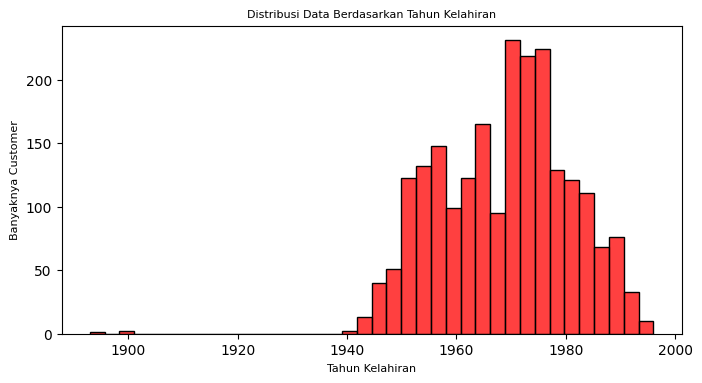

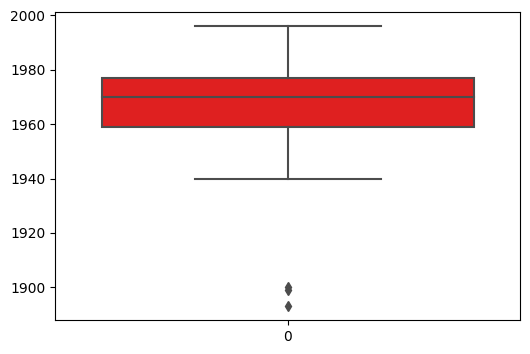

In [23]:
plt.figure(figsize=(8,4))

sb.histplot(df["Year_Birth"],color = 'red')
plt.title("Distribusi Data Berdasarkan Tahun Kelahiran", fontsize = 8)
plt.xlabel("Tahun Kelahiran", fontsize = 8)
plt.ylabel("Banyaknya Customer", fontsize = 8)
plt.show()

#melihat outlier
plt.figure(figsize=(6,4))

sb.boxplot(df["Year_Birth"], color='red')
plt.show()

Dapat dilihat pada grafik bahwa rentang tahun kelahiran customer paling banyak pada 1940 sampai 2000. Sehingga tahun kelahiran <1940 dapat kita kategorikan sebagai outlier. Sekarang kita coba detailkan rentang tahun kelahiran 1940 sampai 2000.

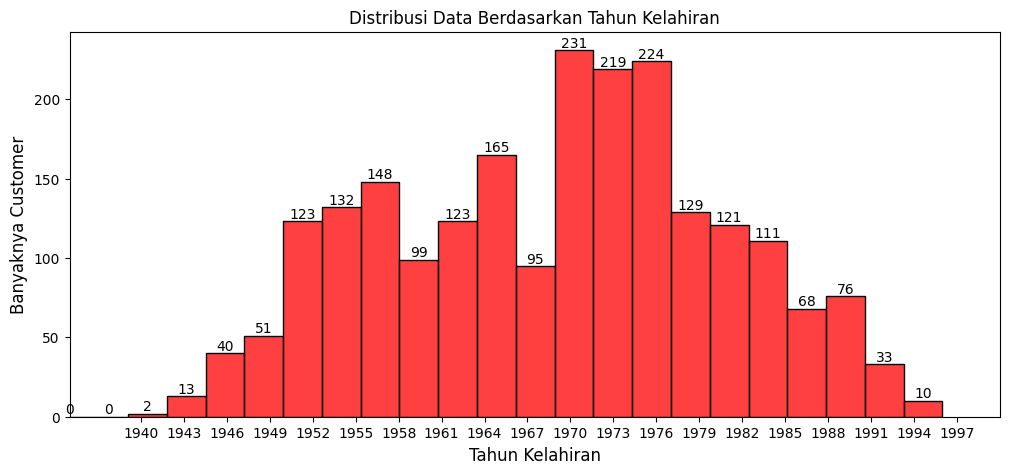

In [32]:
plt.figure(figsize=(12,5))

ax = sb.histplot(df["Year_Birth"],color = 'red')
ax.bar_label(ax.containers[0])
plt.title("Distribusi Data Berdasarkan Tahun Kelahiran", fontsize = 12)
plt.xlabel("Tahun Kelahiran", fontsize = 12)
plt.ylabel("Banyaknya Customer", fontsize = 12)
plt.xlim([1935,2000])
plt.xticks(list(range(1940,2000,3)))
plt.show()

=> Customer terbanyak ada pada rentang tahun kelahiran <u>**1970 sampai 1976**</u>

#### 2.2. Bagaimana distribusi data berdasarkan tingkat pendidikan?

Text(0, 0.5, 'Banyaknya Customer')

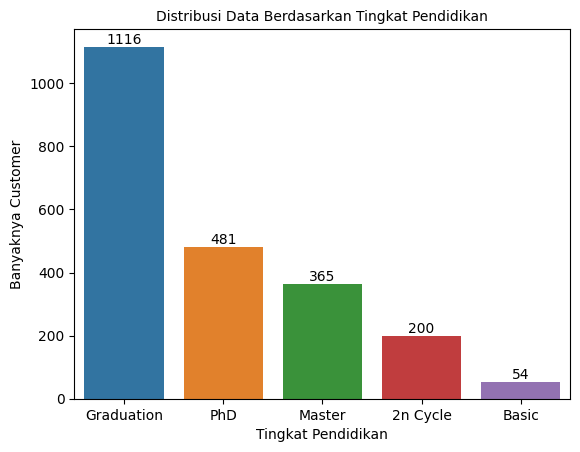

In [30]:
ax = sb.countplot(x= df.Education, order= df.Education.value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Distribusi Data Berdasarkan Tingkat Pendidikan", fontsize = 10)
plt.xlabel("Tingkat Pendidikan", fontsize = 10)
plt.ylabel("Banyaknya Customer", fontsize = 10)

1. Tertinggi => Tingkat Pendidikan <u>'Graduation'</u> = <u>*1116 customers*</u>

2. Terendah => Tingkat Pendidikan <u>'Basic'</u> = <u>*54 customers*</u>

#### 2.3. Bagaimana distribusi data berdasarkan status pernikahan?

Text(0, 0.5, 'Banyaknya Customer')

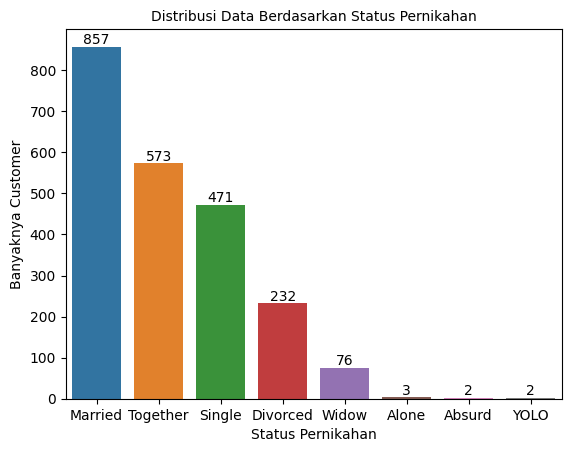

In [33]:
ax = sb.countplot(x= df.Marital_Status, order= df.Marital_Status.value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Distribusi Data Berdasarkan Status Pernikahan", fontsize = 10)
plt.xlabel("Status Pernikahan", fontsize = 10)
plt.ylabel("Banyaknya Customer", fontsize = 10)

=> Terbesar Status Pernikahan <u>'Married'</u> = <u>*857 customers*</u>

#### 2.4. Bagaimana distribusi data berdasarkan penghasilan?

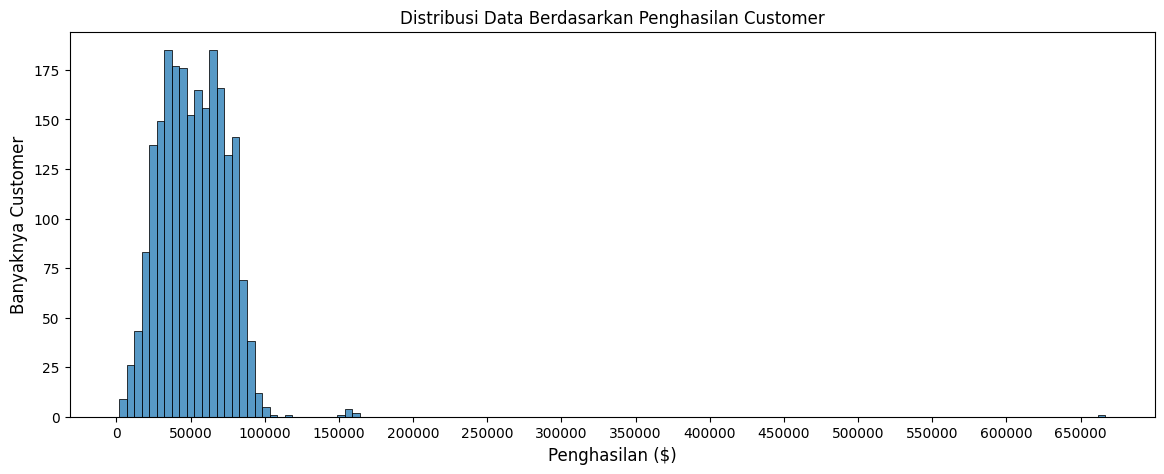

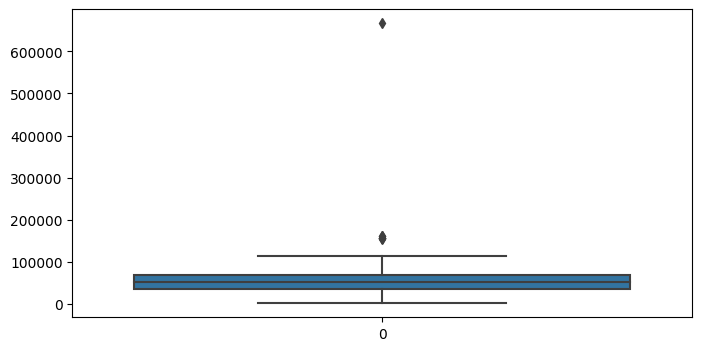

In [35]:
plt.figure(figsize=(14,5))

sb.histplot(df["Income"])
plt.title("Distribusi Data Berdasarkan Penghasilan Customer", fontsize = 12)
plt.xlabel("Penghasilan ($)", fontsize = 12)
plt.ylabel("Banyaknya Customer", fontsize = 12)
plt.xticks(list(range(0,700000,50000)))
plt.show()

#melihat outlier
plt.figure(figsize=(8,4))

sb.boxplot(df["Income"])
plt.show()

Dapat dilihat bahwa pendapatan ada pada rentang sekitar 0 - 100000$. Dan juga outlier pada kolom 'Income' sangat jauh. Sekarang kita coba perkecil rentang pendapatannya

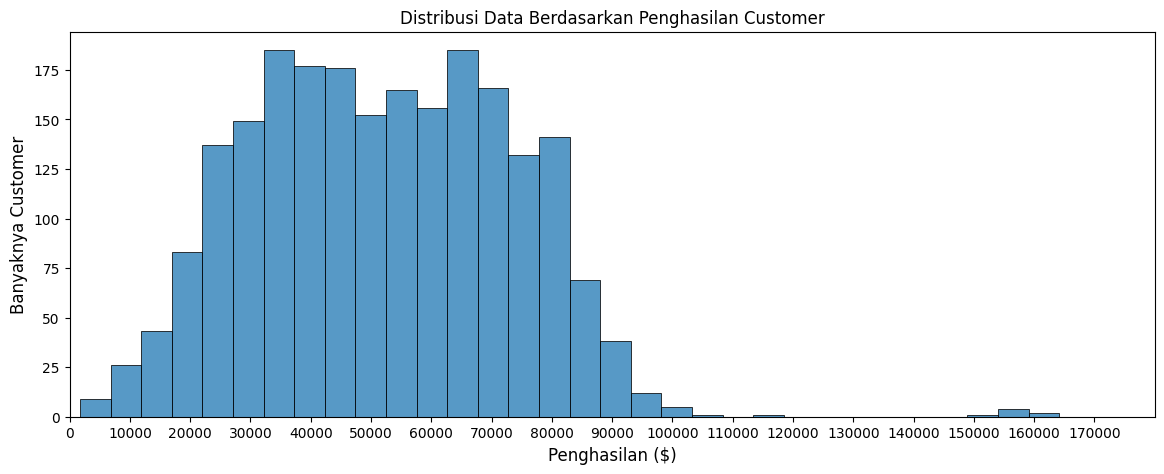

In [38]:
plt.figure(figsize=(14,5))

sb.histplot(df["Income"])
plt.title("Distribusi Data Berdasarkan Penghasilan Customer", fontsize = 12)
plt.xlabel("Penghasilan ($)", fontsize = 12)
plt.ylabel("Banyaknya Customer", fontsize = 12)
plt.xlim([0,180000])
plt.xticks(list(range(0,180000,10000)))
plt.show()

=> Dapat dilihat bahwa rentang pendapatan terbanyak yaitu 35000 $ - 70000 $

#### 2.5. Bagaimana distribusi data berdasarkan banyaknya anak di keluarga tersebut?

Analisa value pada kolom 'Kidhome' dan 'Teenhome'

In [39]:
df['Kidhome'].unique()

array([0, 1, 2])

In [40]:

df['Teenhome'].unique()

array([0, 1, 2])

Dapat dilihat bahwa keduanya memiliki unique value yg sama (0, 1, 2). Maka dari itu, coba kita lihat jumlah perbandingan total 'Kidhome' dan 'Teenhome'

Text(0, 0.5, 'Banyaknya Customer')

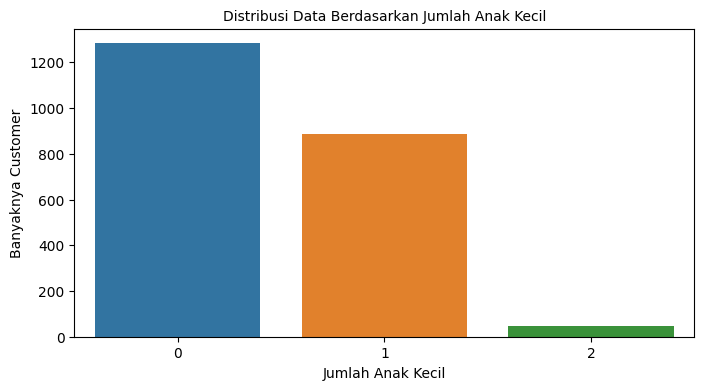

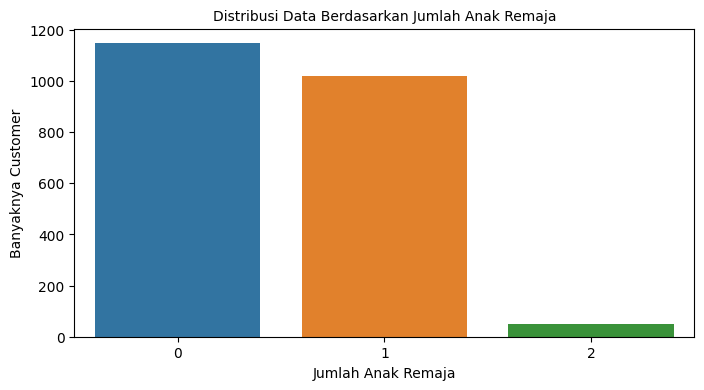

In [41]:
#Dari kolom Kidhome
plt.figure(figsize= (8, 4))

sb.countplot(df, x='Kidhome')
plt.title("Distribusi Data Berdasarkan Jumlah Anak Kecil", fontsize = 10)
plt.xlabel("Jumlah Anak Kecil", fontsize = 10)
plt.ylabel("Banyaknya Customer", fontsize = 10)

#Dari kolom Teenhome
plt.figure(figsize= (8, 4))

sb.countplot(df, x='Teenhome')
plt.title("Distribusi Data Berdasarkan Jumlah Anak Remaja", fontsize = 10)
plt.xlabel("Jumlah Anak Remaja", fontsize = 10)
plt.ylabel("Banyaknya Customer", fontsize = 10)

Jika kita melihat visualisasi di atas, akan lebih mudah untuk dilihat jika kolom 'Kidhome' dan 'Teenhome' disandingkan dalam 1 grafik.

Text(0, 0.5, 'Banyaknya Customer')

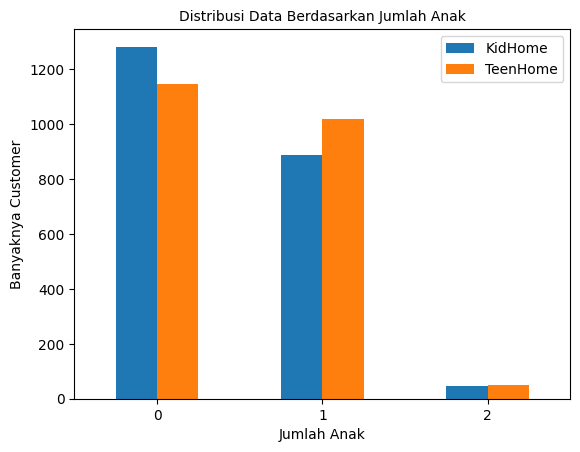

In [44]:
#Grafik kidhome dan teenhome
anak_kecil= df.Kidhome.value_counts()
remaja= df.Teenhome.value_counts()

counts= pd.DataFrame(
    {0:[anak_kecil[0], remaja[0]], 1:[anak_kecil[1], remaja[1]] ,2:[anak_kecil[2], remaja[2]]},
    index=['KidHome', 'TeenHome']).T

counts.plot(kind="bar", rot=0)
plt.title("Distribusi Data Berdasarkan Jumlah Anak", fontsize = 10)
plt.xlabel("Jumlah Anak", fontsize = 10)
plt.ylabel("Banyaknya Customer", fontsize = 10)

=> Customer dengan jumlah 'Kidhome' = 0 dan 'Teenhome' = 0 anak adalah yang terbanyak. Dengan kata lain customer yang tidak memiliki anak.

#### 2.6. Bagaimana distribusi data berdasarkan produk yang dibeli?

Text(0.5, 1.0, 'Distribusi Data Berdasarkan Pembelian Produk')

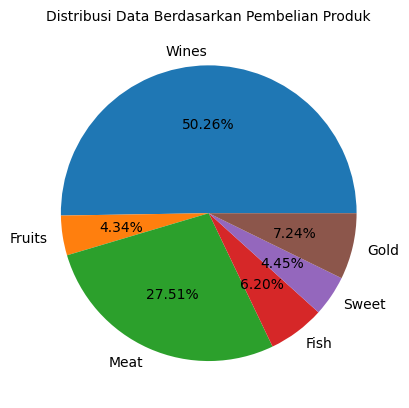

In [46]:
#Melihat pembelian produk terbanyak
product = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].mean(axis=0)

product.plot.pie(
    autopct = '%.2f%%')
plt.title("Distribusi Data Berdasarkan Pembelian Produk", fontsize = 10)

1. <u>'Wines'</u> tertinggi => **50,26%**
2. <u>'Sweet'</u> terendah => **4,45%**

#### 2.7. Bagaimana distribusi data berdasarkan tempat pembelian?

Text(0.5, 1.0, 'Distribusi Data Berdasarkan Tempat Pembelian Produk')

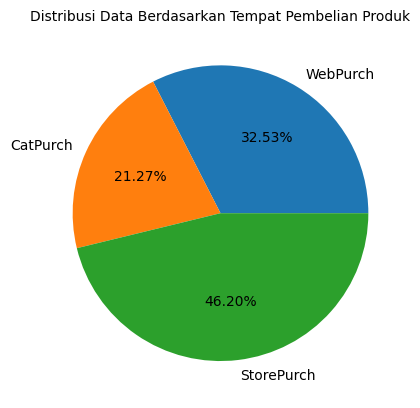

In [47]:
tempat_pembelian = df[['WebPurch', 'CatPurch', 'StorePurch']].sum(axis=0)

tempat_pembelian.plot.pie(
    autopct = '%.2f%%')
plt.title("Distribusi Data Berdasarkan Tempat Pembelian Produk", fontsize = 10)

=> 1. <u>*StorePurch*</u> merupakan tempat pembelian terbanyak sebesar <u>**46,20%**</u>

2. <u>*CatPurch*</u> merupakan tempat pembelian paling sedikit sebesar <u>**21,27%**</u>

#### 2.8. Bagaimana distribusi data berdasarkan promosi yang diselenggarakan?

Text(0.5, 1.0, 'Distribusi Data Berdasarkan Promosi')

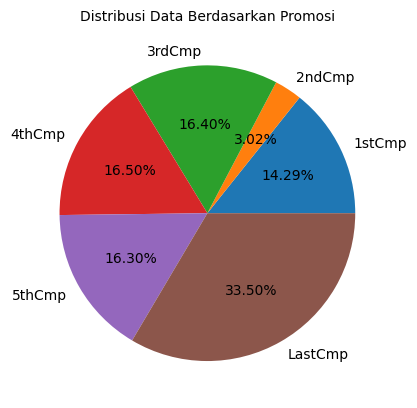

In [48]:
promosi = df[['1stCmp', '2ndCmp', '3rdCmp', '4thCmp', '5thCmp', 'LastCmp']].sum(axis=0)
promosi.plot.pie(
    autopct = '%.2f%%')
plt.title("Distribusi Data Berdasarkan Promosi", fontsize = 10)

=> <u>*LastCmp*</u> tertinggi => **33,50%** yang merupakan <u>Promosi Terakhir</u> adalah promosi yang paling banyak diminati

#### 2.9. Berapa persentase customer yang komplen?

In [56]:
komplen = df.Complain.map({0:'Not Complain',1:'Complain'}).value_counts()

fig = px.pie(values=komplen.values, names=komplen.index, hole=0.6)
fig.update_layout(title_text='Persentase Customer Komplen', title_x=0.5)

### 2.10. Summary Analysis Tiap Kolom

1 => Customer terbanyak ada pada rentang tahun kelahiran <u>**1970 sampai 1976**</u>

2 => Customer dengan Tingkat Pendidikan terbanyak adalah <u>'Graduation'</u> dengan <u>*1116 customers*</u> dan terendah Tingkat Pendidikan <u>'Basic'</u> dengan <u>*54 customers*</u>

3 => Customer dengan Status Pernikahan terbanyak adalah <u>'Married'</u> dengan <u>*857 customers*</u> dan terendah customer dengan Status Pernikahan <u>'Alone', 'Absurd' dan 'YOLO'</u>

4 => Rentang penghasilan customer terbanyak yaitu 35000 $ - 70000 $

5 => Customer yang tidak memiliki anak kecil dan anak remaja adalah yang paling banyak

6 => <u>'Wines'</u> merupakan produk yang paling banyak dibeli yaitu sebesar **50,26%** dan <u>'Sweet'</u> terendah sebesar **4,45%**

7 => <u>*StorePurch*</u> merupakan tempat pembelian terbanyak sebesar <u>**46,20%**</u> sedangkan <u>*CatPurch*</u> merupakan tempat pembelian paling sedikit sebesar <u>**21,27%**</u>

8 => <u>*LastCmp*</u> merupakan promosi yang diadakan dengan keminatan tertinggi yaitu **33,50%** yang merupakan <u>Promosi Terakhir</u> dan <u>*2ndCmp*</u> adalah yang paling sedikit diminati yaitu **3,02%**

9 => Dari keseluruhan customer, hanya 0,948% yang komplen terhadap toko

## 3. Data Analysis Hubungan Antar Kolom

### 3.1. Hubungan Tahun Kelahiran terhadap Pembelian Produk (Rata-rata pembelian)

<Axes: title={'center': 'Bagaimana Hubungan Tahun Kelahiran dan Pembelian Produk?'}, xlabel='Year_Birth', ylabel='Pembelian'>

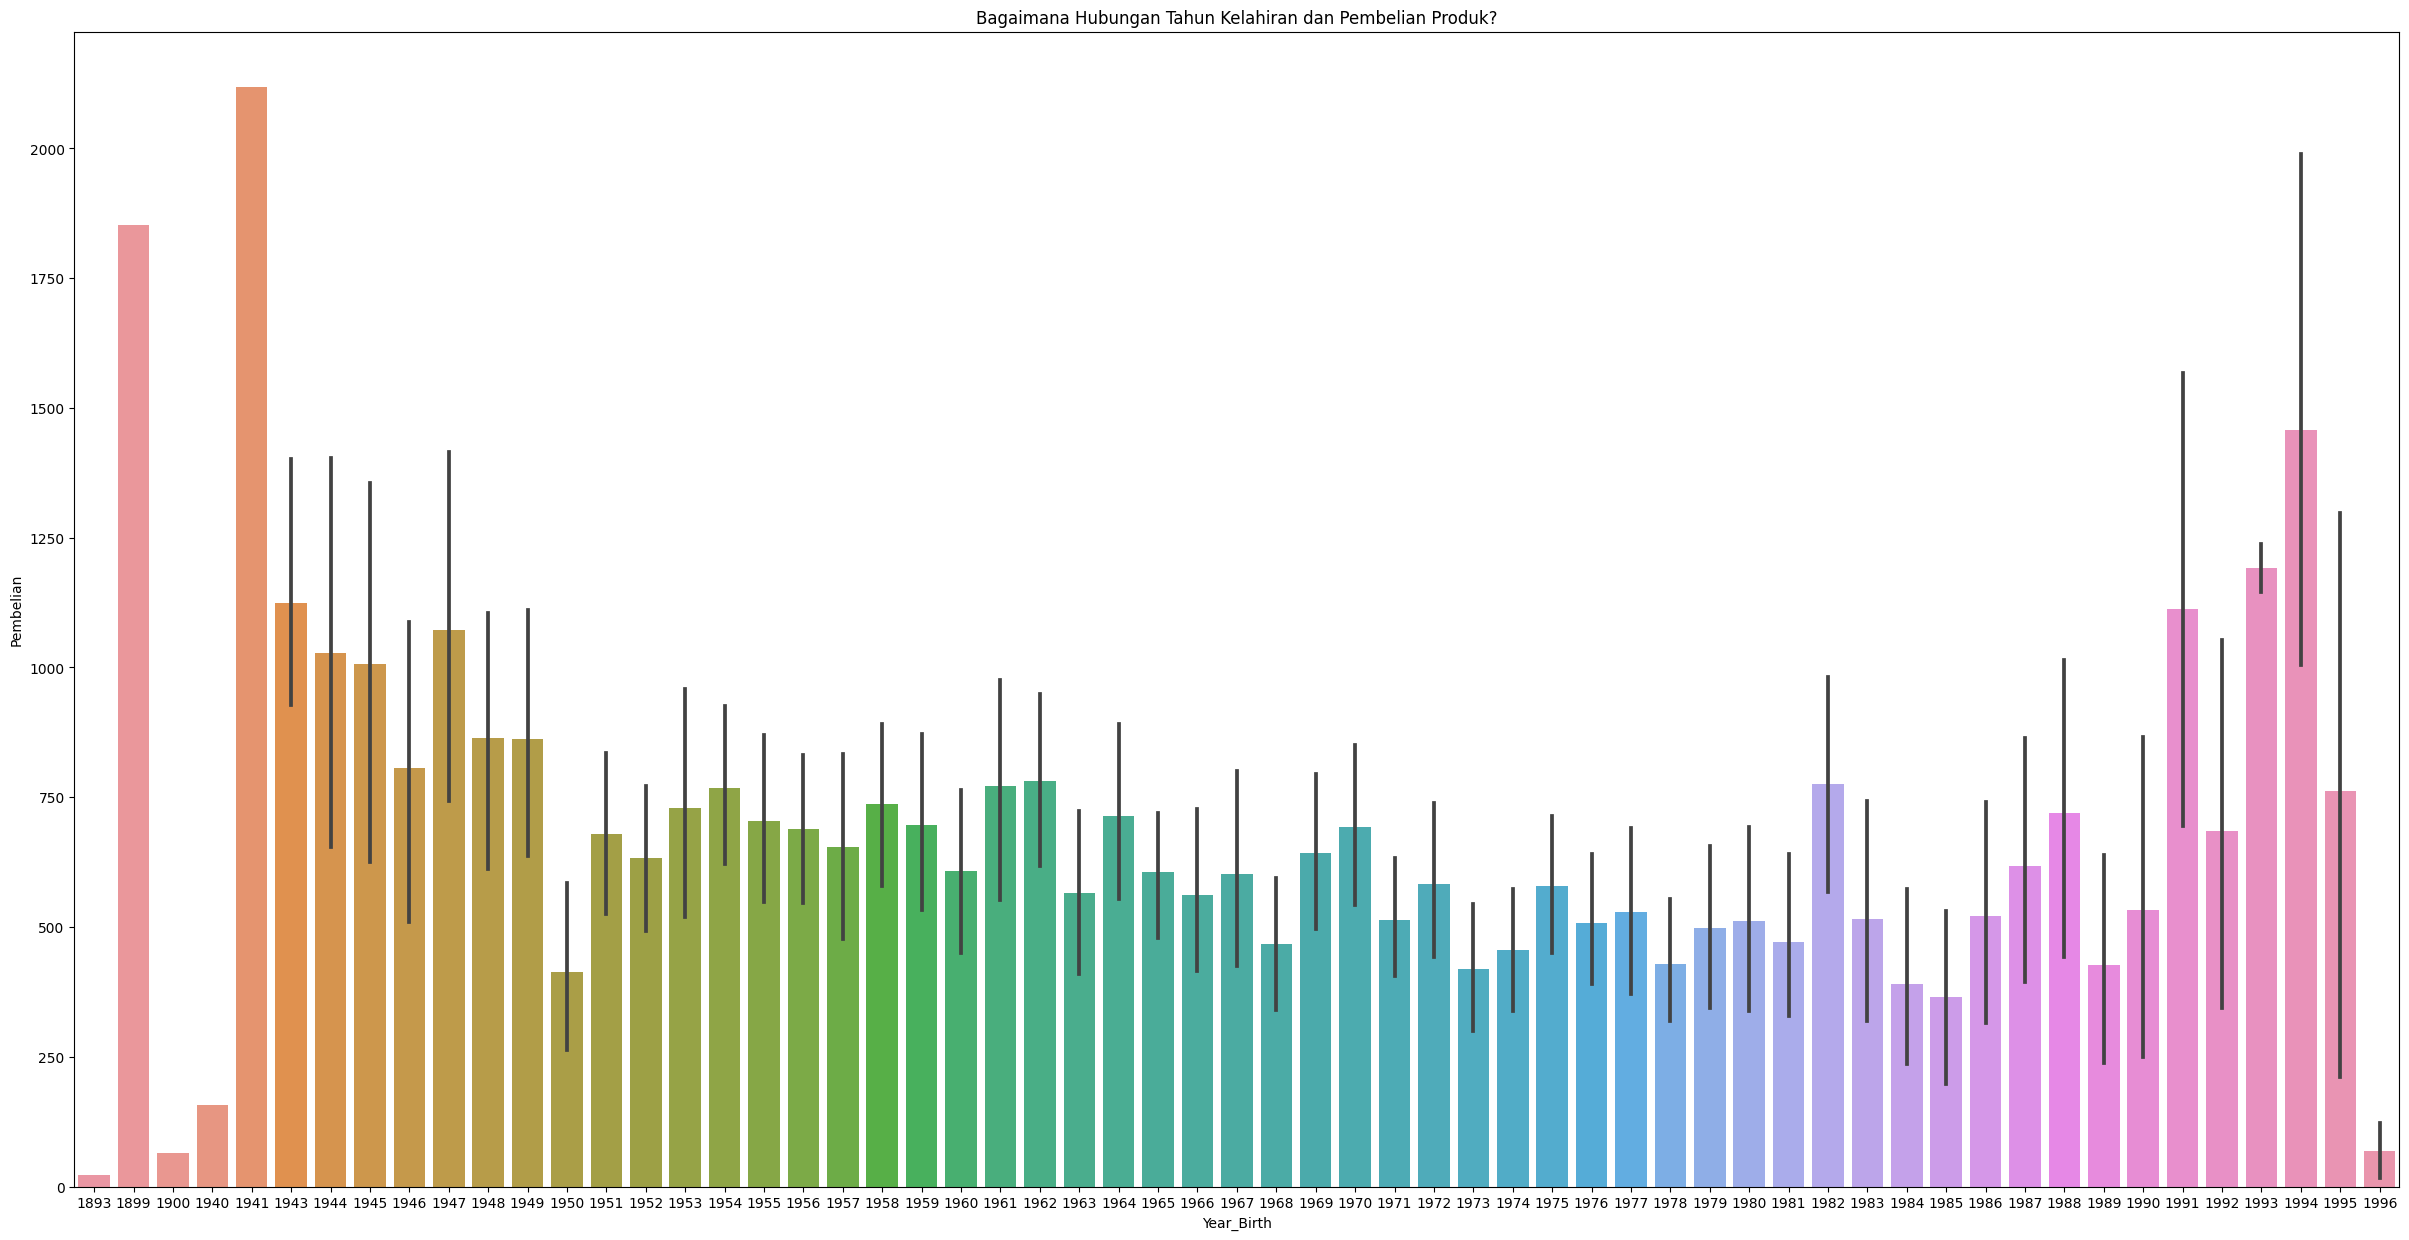

In [126]:
df['Pembelian'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']

plt.figure(figsize=(30,15))
plt.title("Bagaimana Hubungan Tahun Kelahiran dan Pembelian Produk?",fontsize=12)
sb.barplot(x="Year_Birth", y="Pembelian", data = df)

=> Ternyata customer yang paling banyak pembelian produk yaitu pada tahun kelahiran 1941.

### 3.2. Hubungan Tingkat Pendidikan terhadap Pembelian Produk (Total Pembelian)

Text(0, 0.5, 'Banyaknya Produk yang Dibeli')

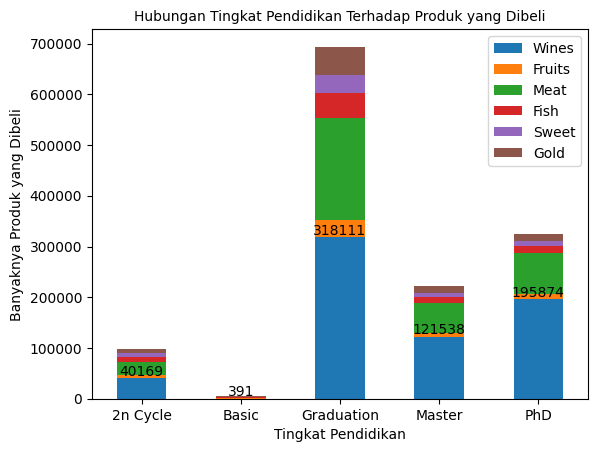

In [77]:
edu_prod = df.groupby('Education')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum()

ax = edu_prod.plot(kind='bar', stacked=True, rot= 0)
ax.bar_label(ax.containers[0])
plt.title("Hubungan Tingkat Pendidikan Terhadap Produk yang Dibeli", fontsize = 10)
plt.xlabel("Tingkat Pendidikan", fontsize = 10)
plt.ylabel("Banyaknya Produk yang Dibeli", fontsize = 10)

Dapat dilihat bahwa customer dengan tingkat pendidikan <u>'Basic'</u> merupakan yang paling rendah dalam hal pembelian produk dan tingkat pendidikan <u>'Graduation'</u> merupakan yang paling tinggi dalam hal pembelian produk (Total)

Dalam hal ini kita akan menganalisa bagaimana hal ini bisa terjadi, apakah <u>*Tingkat Pendidikan*</u> berbanding lurus dengan <u>*Rata-rata Penghasilan*</u> ?? Sehingga customer dengan <u>*Tingkat Pendidikan*</u> yang tinggi dapat membeli produk yang banyak.

Text(0, 0.5, 'Rata-rata Penghasilan ($)')

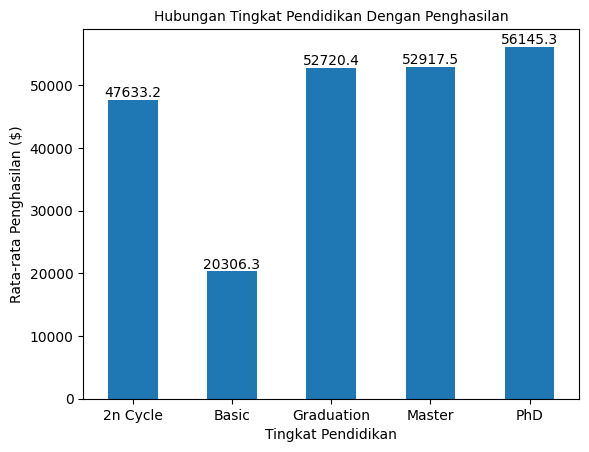

In [73]:
edu_inc = df.groupby('Education')['Income'].mean()

ax = edu_inc.plot(kind='bar', rot=0)
ax.bar_label(ax.containers[0])
plt.title("Hubungan Tingkat Pendidikan Dengan Penghasilan", fontsize = 10)
plt.xlabel("Tingkat Pendidikan", fontsize = 10)
plt.ylabel("Rata-rata Penghasilan ($)", fontsize = 10)

Dapat dilihat benar bahwa <u>*Tingkat Pendidikan*</u> berpengaruh terhadap <u>*Penghasilan*</u> (Rata-rata penghasilan)

### 3.3. Hubungan Status Pernikahan terhadap Pembelian Produk

Text(0, 0.5, 'Banyaknya Produk yang Dibeli')

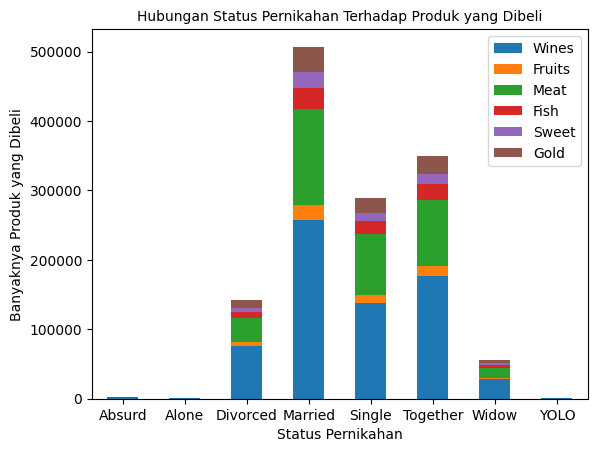

In [121]:
marital_prod = df.groupby('Marital_Status')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum()

ax = marital_prod.plot(kind='bar', stacked=True, rot= 0)
plt.title("Hubungan Status Pernikahan Terhadap Produk yang Dibeli", fontsize = 10)
plt.xlabel("Status Pernikahan", fontsize = 10)
plt.ylabel("Banyaknya Produk yang Dibeli", fontsize = 10)

=> Status Pernikahan 'Married' tertinggi dalam pembelian semua produk.
Ini mengindikasikan bahwa kemungkinan customer dengan Status Pernikahan 'Married' memiliki income yang tinggi.

Sekarang kita akan buktikan hubungan <u>Status Pernikahan</u> terhadap <u>Income</u>

Text(0, 0.5, 'Penghasilan ($)')

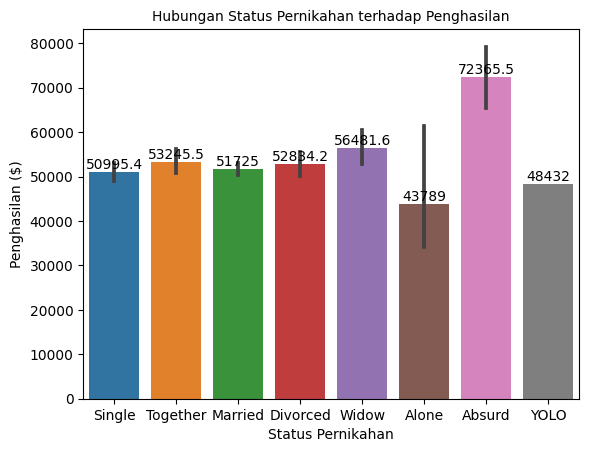

In [78]:
ax = sb.barplot(data=df, x='Marital_Status', y='Income')
ax.bar_label(ax.containers[0])
plt.title("Hubungan Status Pernikahan terhadap Penghasilan", fontsize = 10)
plt.xlabel("Status Pernikahan", fontsize = 10)
plt.ylabel("Penghasilan ($)", fontsize = 10)

=> Ternyata 'Absurd' yang memiliki status penghasilan **tertinggi**. Kemungkinan customer dengan status 'absurd' lebih memilih untuk tidak spend dalam pembelian produk di toko, tetapi untuk hal-hal lain yang  mereka sukai.

### 3.4. Hubungan Jumlah Anak terhadap Pembelian Produk

=> Dapat dilihat bahwa 4thCmp (Promosi ke-4) yang merupakan promosi dengan pembelian terbanyak.

Kita tahu bahwa LastCmp adalah yang paling banyak diminati, tetapi produk yang dibeli tidak lebih banyak daripada 4thCmp.

[Text(0, 0, '1105.25'),
 Text(0, 0, '474.7'),
 Text(0, 0, '246.736'),
 Text(0, 0, '255.5')]

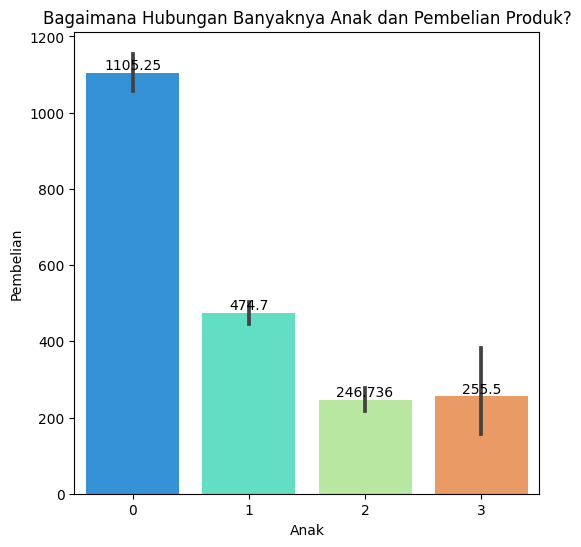

In [104]:
df['Anak'] = df['Kidhome'] + df['Teenhome']

plt.figure(figsize=(6,6))
plt.title("Bagaimana Hubungan Banyaknya Anak dan Pembelian Produk?",fontsize=12)
ax = sb.barplot(x="Anak", y="Pembelian", data = df, palette="rainbow")
ax.bar_label(ax.containers[0])

=> Ternyata banyaknya anak tidak menjamin pembelian produk yang banyak.

Hal tersebut dikarenakan produk yang paling banyak dibeli adalah produk 'Wines' sedangkan anak-anak tidak dianjurkan untuk minum 'Wines'.

### 3.5. Hubungan Promosi terhadap Pembelian Produk

[Text(0, 0, '460.194'),
 Text(0, 0, '827.797'),
 Text(0, 0, '1059.2'),
 Text(0, 0, '1486.92'),
 Text(0, 0, '1673.53'),
 Text(0, 0, '1514')]

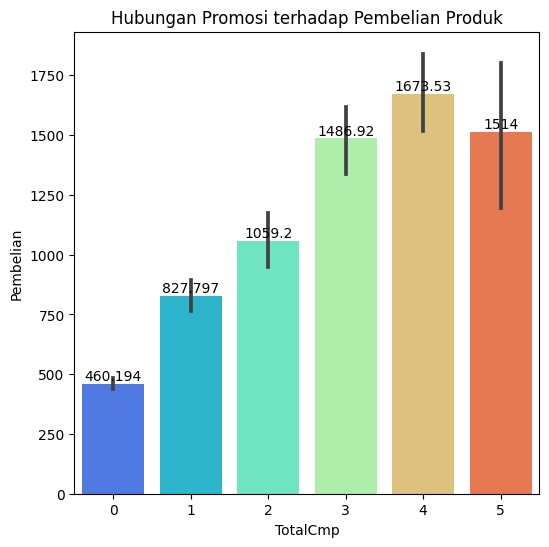

In [93]:
df['TotalCmp'] = df['1stCmp'] + df['2ndCmp'] + df['3rdCmp'] + df['4thCmp'] + df['5thCmp'] + df['LastCmp']

plt.figure(figsize=(6,6))
plt.title("Hubungan Promosi terhadap Pembelian Produk",fontsize=12)
ax = sb.barplot(x="TotalCmp", y="Pembelian", data = df, palette="rainbow")
ax.bar_label(ax.containers[0])

### 3.6. Hubungan Komplen terhadap Promosi

Text(0.5, 1.0, 'LastCmp vs Complain')

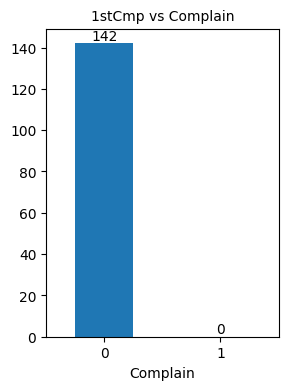

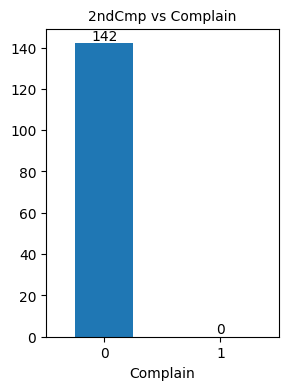

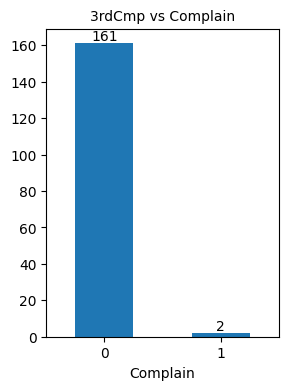

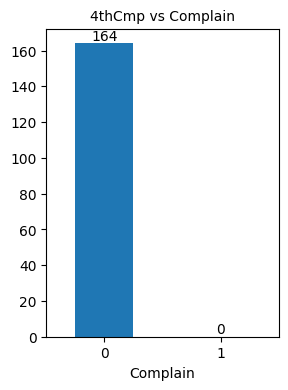

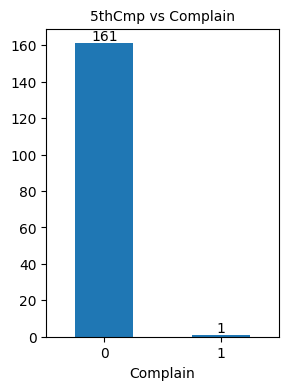

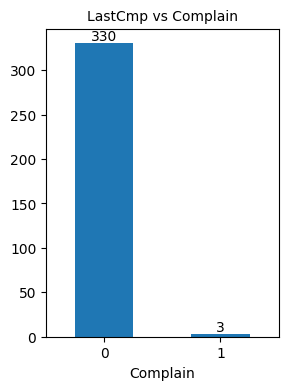

In [120]:
#1stCmp vs Komplen
cmp1_komp = df.groupby('Complain')['1stCmp'].sum()

plt.figure(figsize=(3,4))
ax = cmp1_komp.plot(kind='bar', rot=0)
ax.bar_label(ax.containers[0])
plt.title("1stCmp vs Complain", fontsize = 10)

#2ndCmp vs Komplen
cmp2_komp = df.groupby('Complain')['2ndCmp'].sum()

plt.figure(figsize=(3,4))
bx = cmp1_komp.plot(kind='bar', rot=0)
bx.bar_label(bx.containers[0])
plt.title("2ndCmp vs Complain", fontsize = 10)

#3rdCmp vs Komplen
cmp3_komp = df.groupby('Complain')['3rdCmp'].sum()

plt.figure(figsize=(3,4))
cx = cmp3_komp.plot(kind='bar', rot=0)
cx.bar_label(cx.containers[0])
plt.title("3rdCmp vs Complain", fontsize = 10)

#4thCmp vs Komplen
cmp4_komp = df.groupby('Complain')['4thCmp'].sum()

plt.figure(figsize=(3,4))
dx = cmp4_komp.plot(kind='bar', rot=0)
dx.bar_label(dx.containers[0])
plt.title("4thCmp vs Complain", fontsize = 10)

#5thCmp vs Komplen
cmp5_komp = df.groupby('Complain')['5thCmp'].sum()

plt.figure(figsize=(3,4))
ex = cmp5_komp.plot(kind='bar', rot=0)
ex.bar_label(ex.containers[0])
plt.title("5thCmp vs Complain", fontsize = 10)

#LastCmp vs Komplen
last_komp = df.groupby('Complain')['LastCmp'].sum()

plt.figure(figsize=(3,4))
fx = last_komp.plot(kind='bar', rot=0)
fx.bar_label(fx.containers[0])
plt.title("LastCmp vs Complain", fontsize = 10)